In [1]:
from sqlalchemy_mutable.utils import partial

from hemlock import User, Page
from hemlock.app import create_test_app
from hemlock.questions import Label, Input

app = create_test_app()

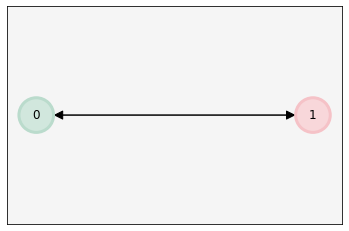

In [2]:
def make_user_greeting():
    return [
        Page(
            input:=Input(
                "What's your name?",
                validate=require_response
            )
        ),
        Page(
            Label(compile=partial(greet_user, input)),
            back=True
        )
    ]


def require_response(input):
    if input.response is None:
        return False, "Please enter your name."
    return True, "Nice name!"


def greet_user(label, input):
    label.label = f"Hello, {input.response}!"


user = User.make_test_user(make_user_greeting)
user.test_get().display()

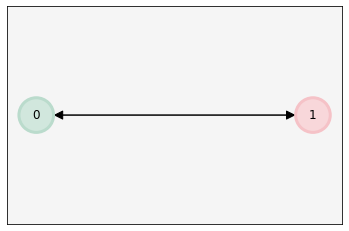

In [3]:
user.test_request().display()

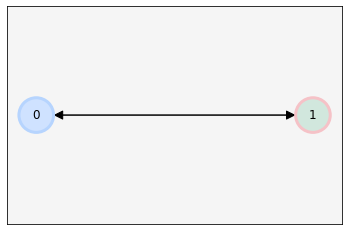

In [4]:
user.test_request(["World"]).display()

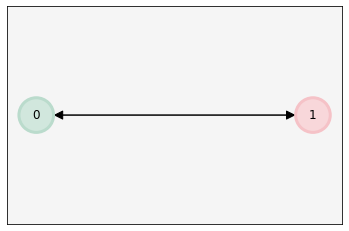

In [5]:
user.test_request(direction="back").display()